In [1]:
import pandas as pd  #to load and read the data,cleaning and preprocessing as well
from sklearn.preprocessing import LabelEncoder, StandardScaler   #scaling the data for equalization 
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score, calinski_harabasz_score   #for finding the performance of k-mean cluster using silhouette_score and calinski_harabasz_score



In [2]:
# dataset loading 
data = pd.read_csv("customer_segmentation.csv")


In [3]:
#reading dataset .head() shows top five 
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
#shape of data
print("Size of the dataset by row and column are respectively : ", data.shape)

Size of the dataset by row and column are respectively :  (2627, 10)


In [5]:
#descirbe the data
print("Description of data :", data.describe())

Description of data :                   ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.000000    18.000000         0.000000     1.000000
25%    461162.500000    30.000000         0.000000     2.000000
50%    463379.000000    41.000000         1.000000     2.000000
75%    465696.000000    53.000000         4.000000     4.000000
max    467968.000000    89.000000        14.000000     9.000000


In [6]:
#will se the type of data each column had and number of not null values usnig info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [7]:
#droping column according to importance of my analysis 
data= data.drop("Var_1", axis=1)
data= data.drop("ID", axis=1)

In [8]:
#sum of the null values 
data.isnull().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64

In [9]:
#droping null values using dropna()
data = data.dropna()

In [10]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0


In [11]:
data.shape

(2178, 8)

In [12]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [13]:
data = data.rename(columns = {"Spending_Score":"Purchase_history"})


In [14]:
# Encode categorical variables
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Ever_Married"] = le.fit_transform(data["Ever_Married"])
data["Graduated"] = le.fit_transform(data["Graduated"])
data["Profession"] = le.fit_transform(data["Profession"])
data["Purchase_history"] = le.fit_transform(data["Purchase_history"])


In [15]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Purchase_history,Family_Size
0,0,1,36,1,2,0.0,2,1.0
1,1,1,37,1,5,8.0,0,4.0
3,1,1,59,0,4,11.0,1,2.0
5,1,1,47,1,1,0.0,1,5.0
6,1,1,61,1,1,5.0,2,3.0


In [16]:
# Feature scaling 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

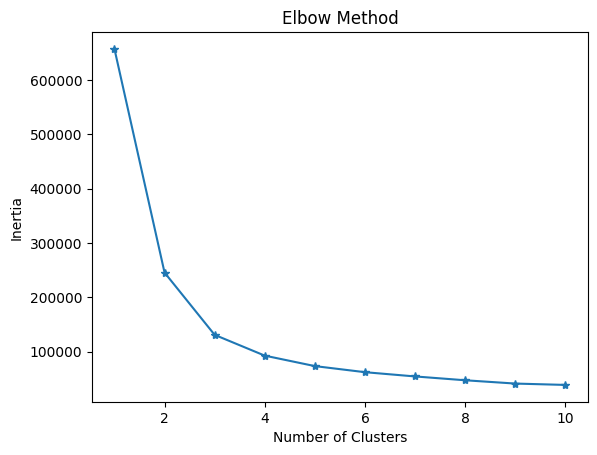

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Gender','Age', 'Family_Size', 'Work_Experience', 'Purchase_history','Profession'] 
#k-mean clustering is a part of unsupervised learning where we cannot consider any column as Target column 
inertia = []  #creates an empty list named inertia to store the inertia values for different numbers of clusters (k)
for i in range(1, 11):  #from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data[features])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# Define distance metrics and initialization methods
distance_metrics = ["euclidean", "manhattan", "cosine"]
init_methods = ["random", "k-means++"]

In [19]:
# Iterate through configurations and evaluate clustering
results = {}
for metric in distance_metrics:
  for init in init_methods:
    # K-means clustering with specific configuration
    kmeans = KMeans(n_clusters=3,init=init, random_state=42)
    kmeans.fit(data)
       # Evaluate cluster quality
    silhouette = silhouette_score(scaled_data, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans.labels_)

    # Store results
    results[(metric, init)] = {"silhouette": silhouette, "calinski_harabasz": calinski_harabasz}


In [20]:
# Print results
print("Clustering Results:")
for key, value in results.items():
  print(f"Metric: {key[0]}, Initialization: {key[1]}")
  print(f"Silhouette Score: {value['silhouette']}")
  print(f"Calinski-Harabasz Index: {value['calinski_harabasz']}")
  #print("-"*30)



Clustering Results:
Metric: euclidean, Initialization: random
Silhouette Score: 0.10771990491367356
Calinski-Harabasz Index: 306.5159660213235
Metric: euclidean, Initialization: k-means++
Silhouette Score: 0.1031458675427055
Calinski-Harabasz Index: 294.5468659208394
Metric: manhattan, Initialization: random
Silhouette Score: 0.10771990491367356
Calinski-Harabasz Index: 306.5159660213235
Metric: manhattan, Initialization: k-means++
Silhouette Score: 0.1031458675427055
Calinski-Harabasz Index: 294.5468659208394
Metric: cosine, Initialization: random
Silhouette Score: 0.10771990491367356
Calinski-Harabasz Index: 306.5159660213235
Metric: cosine, Initialization: k-means++
Silhouette Score: 0.1031458675427055
Calinski-Harabasz Index: 294.5468659208394
